<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages

# All packages are installed within each model iteration.

In [1]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2024-12-16 22:01:15.382171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734357675.512710     915 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734357675.550122     915 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 22:01:15.906038: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.18.0
Built with CUDA: True
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Step 1: Data Loading

In [2]:
import os

# Defining the directories for base, validation, and test data
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Steps 2 & 3:  Develop the Image Classification Models and Evaluate the Developed Models using Testing Images

### Base Model (70 epochs optimal) 0.656000018119812

I first built a basic model with 4 convolutional layers to see how hard the data would be to deal with.

In [4]:
# Build the Model
from tensorflow.keras import layers
from tensorflow.keras import models

img_size = 150

model_0 = models.Sequential()
model_0.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_0.add(layers.MaxPooling2D((2, 2)))
model_0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_0.add(layers.MaxPooling2D((2, 2)))
model_0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_0.add(layers.MaxPooling2D((2, 2)))
model_0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_0.add(layers.MaxPooling2D((2, 2)))
model_0.add(layers.Flatten())
model_0.add(layers.Dense(512, activation='relu'))
model_0.add(layers.Dense(10, activation='softmax'))
model_0.summary()

/home/cz/assignment/assignment/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734137563.965814     912 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:06:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_0.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_0.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=70,  # Tested at 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


/home/cz/assignment/assignment/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70


I0000 00:00:1734137566.003650    1000 service.cc:148] XLA service 0x7fd27c00af20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734137566.003892    1000 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-12-14 08:52:46.037352: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734137566.136072    1000 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/250 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - acc: 0.1111 - loss: 2.3114

I0000 00:00:1734137569.263896    1000 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - acc: 0.1761 - loss: 2.2056

/home/cz/assignment/assignment/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 117ms/step - acc: 0.1764 - loss: 2.2051 - val_acc: 0.3630 - val_loss: 1.8248
Epoch 2/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.3356 - loss: 1.8613 - val_acc: 0.4035 - val_loss: 1.7252
Epoch 3/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - acc: 0.3825 - loss: 1.7533 - val_acc: 0.3795 - val_loss: 1.8017
Epoch 4/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.4009 - loss: 1.7093 - val_acc: 0.4280 - val_loss: 1.6911
Epoch 5/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - acc: 0.4371 - loss: 1.6087 - val_acc: 0.4090 - val_loss: 1.7410
Epoch 6/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4427 - loss: 1.6001 - val_acc: 0.4620 - val_loss: 1.5667
Epoch 7/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - acc: 0.4574 - loss: 1.5635 - val_acc: 0.4635 - val_loss: 1.5917
Epoch 8/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4769 - loss: 1.5116 - val_acc: 0.4890 - val_loss: 1.5197
Epoch 9/70
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 9

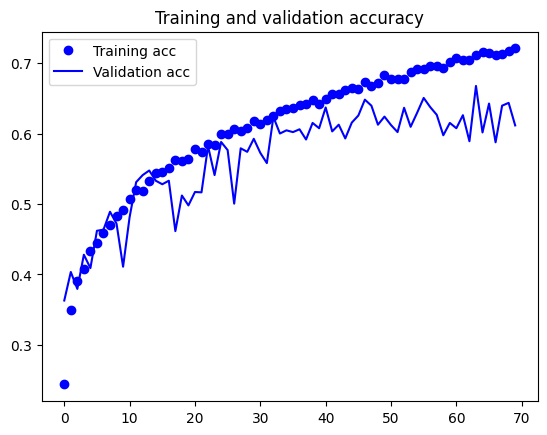

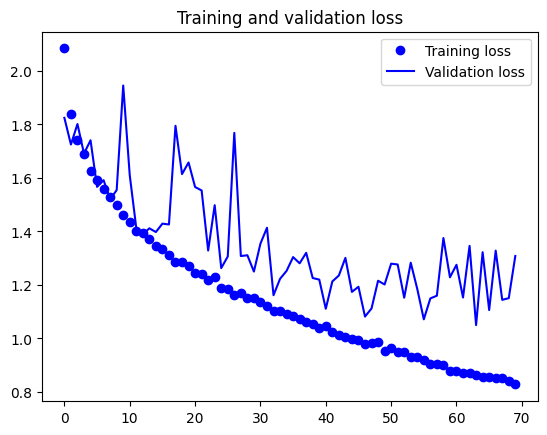

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model0_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model0_l')

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_0.evaluate(test_generator, steps=50) 
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.6742 - loss: 1.2699
test acc: 0.656000018119812


In [8]:
# Save the Model
model_0.save('models/food_model_0.h5')

### Model #1 (4 layers, 2 Regularizers, RMSprop 5e-4 | 50 epochs optimal)  0.6859999895095825

After the base model's performance, I added 2 regularizers and also increase the learning rate to see if that would help the model learn better

In [9]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))
model_1.summary()

/home/cz/assignment/assignment/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,586 (26.00 MB)

 Trainable params: 6,816,586 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_1.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=50, # Tested at 100 previously 
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - acc: 0.1936 - loss: 2.3930 - val_acc: 0.3810 - val_loss: 1.9719
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.3550 - loss: 1.9117 - val_acc: 0.3680 - val_loss: 1.9720
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - acc: 0.4109 - loss: 1.7299 - val_acc: 0.4365 - val_loss: 1.6965
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4273 - loss: 1.6874 - val_acc: 0.4705 - val_loss: 1.5955
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4614 - loss: 1.6023 - val_acc: 0.4720 - val_loss: 1.5665
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4827 - loss: 1.5637 - val_acc: 0.5045 - val_loss: 1.4913
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - acc: 0.4942 - loss: 1.5118 - val_acc: 0.5300 - val_loss: 1.4204
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - acc: 0.4932 

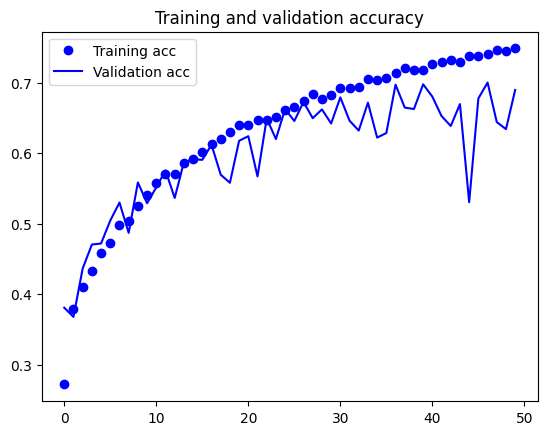

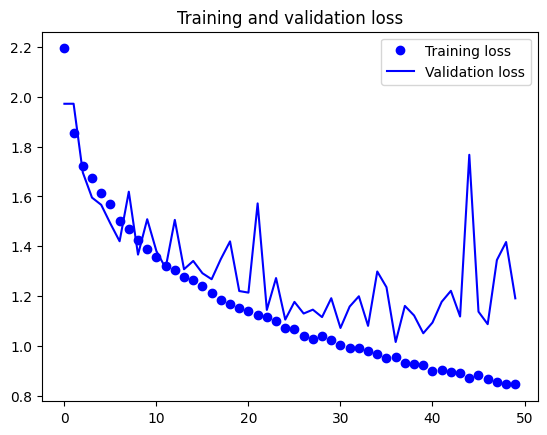

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model1_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model1_l')

plt.show()

In [12]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_1.evaluate(test_generator, steps=50) 
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6762 - loss: 1.2178
test acc: 0.6859999895095825


In [13]:
# Save the Model
model_1.save('models/food_model_1.h5')

### Model #2 (5 layers, no regularizers, RMSprop 5e-4 | 40 epochs optimal) 0.6439999938011169

Seeing as how Model #1 showed that regularizers could help the model classify the items better, I tested it once again by removing the regularizer and adding an extra layer so that more connections can be made

In [14]:
# Build the Model 
from tensorflow.keras import layers, models, regularizers
img_size = 150

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,930 (4.07 MB)

 Trainable params: 1,065,930 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=75, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

history = model_2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=40, # Tested at 100 epochs previously
      validation_data=validation_generator,
      validation_steps=100) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - acc: 0.1522 - loss: 2.2334 - val_acc: 0.3045 - val_loss: 1.9371
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - acc: 0.2896 - loss: 1.9710 - val_acc: 0.3195 - val_loss: 1.8818
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - acc: 0.3512 - loss: 1.8390 - val_acc: 0.3770 - val_loss: 1.7730
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - acc: 0.3818 - loss: 1.7619 - val_acc: 0.3625 - val_loss: 1.8167
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - acc: 0.3947 - loss: 1.7274 - val_acc: 0.4175 - val_loss: 1.6614
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - acc: 0.4069 - loss: 1.6833 - val_acc: 0.3970 - val_loss: 1.7993
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - acc: 0.4282 - loss: 1.6599 - val_acc: 0.4410 - val_loss: 1.6355
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - acc: 0.440

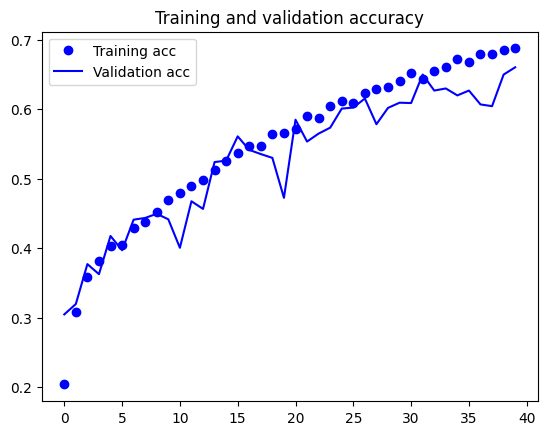

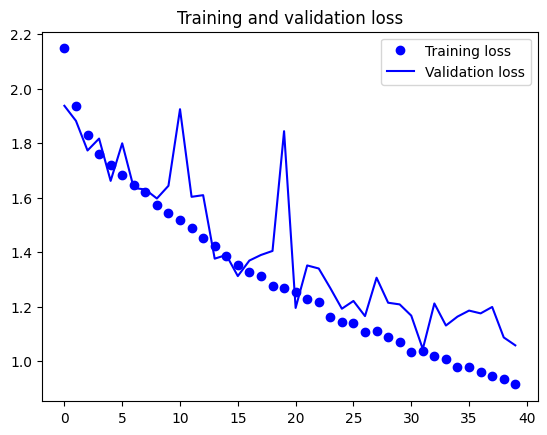

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model2_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model2_l')

plt.show()

In [17]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_2.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6235 - loss: 1.2251
test acc: 0.6439999938011169


In [18]:
# Save the Model
model_2.save('models/food_model_2.h5')

### Model #3 (4 layers, 2 dropout layers, 1 regularizer, RMSprop 5e-4 | 60 epochs optimal)  0.6940000057220459

Model 2 showed that 4 layers are sufficient enough layers for the models to understand on, and also that regularizers are important. Therefore, I added in 1 regularizer and also drop out layer to see if it is because of the model overfitting.

In [19]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,586 (26.00 MB)

 Trainable params: 6,816,586 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_3.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=60, # Tested at 100 previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - acc: 0.2021 - loss: 2.2055 - val_acc: 0.3535 - val_loss: 1.9668
Epoch 2/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - acc: 0.3927 - loss: 1.7826 - val_acc: 0.3635 - val_loss: 1.9224
Epoch 3/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4103 - loss: 1.6751 - val_acc: 0.4395 - val_loss: 1.6636
Epoch 4/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - acc: 0.4313 - loss: 1.6391 - val_acc: 0.4230 - val_loss: 1.7896
Epoch 5/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.4631 - loss: 1.5678 - val_acc: 0.4925 - val_loss: 1.5251
Epoch 6/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - acc: 0.4883 - loss: 1.5034 - val_acc: 0.4335 - val_loss: 1.8195
Epoch 7/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.5050 - loss: 1.4586 - val_acc: 0.4655 - val_loss: 1.7256
Epoch 8/60
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.5223 

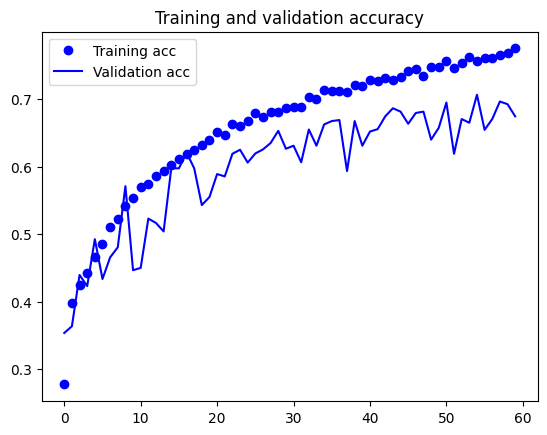

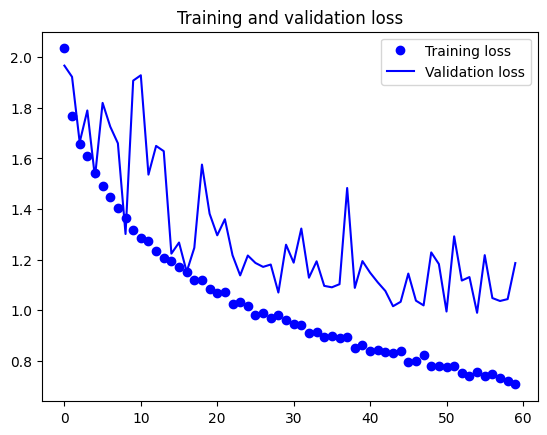

In [21]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model3_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model3_l')

plt.show()

In [22]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_3.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7081 - loss: 1.0885
test acc: 0.6940000057220459


In [23]:
model_3.save('models/food_model_3.h5')

### Model #4 (4 layers, 2 regularizers, SGD 1e-2, momentum 0.7 | 50 epoch optimal) 0.6639999747276306

After confirming that regularizers and drop out layers are effective for the models, I wanted to test out different optimizers, so I tried the SGD optimizer, with the hyperparameter momemtum as well

In [24]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,586 (26.00 MB)

 Trainable params: 6,816,586 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-2,momentum=0.7),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_4.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=50, # Tested at 100 previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - acc: 0.1362 - loss: 2.5285 - val_acc: 0.2725 - val_loss: 2.2495
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - acc: 0.3086 - loss: 2.2063 - val_acc: 0.3845 - val_loss: 2.0446
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - acc: 0.3793 - loss: 2.0118 - val_acc: 0.4260 - val_loss: 1.8901
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4066 - loss: 1.9304 - val_acc: 0.4405 - val_loss: 1.8825
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - acc: 0.4174 - loss: 1.8935 - val_acc: 0.4875 - val_loss: 1.7635
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.4464 - loss: 1.8265 - val_acc: 0.4595 - val_loss: 1.7882
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - acc: 0.4651 - loss: 1.7886 - val_acc: 0.4670 - val_loss: 1.7960
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4610 

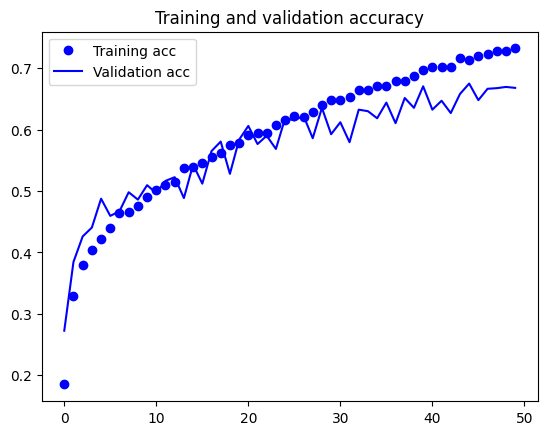

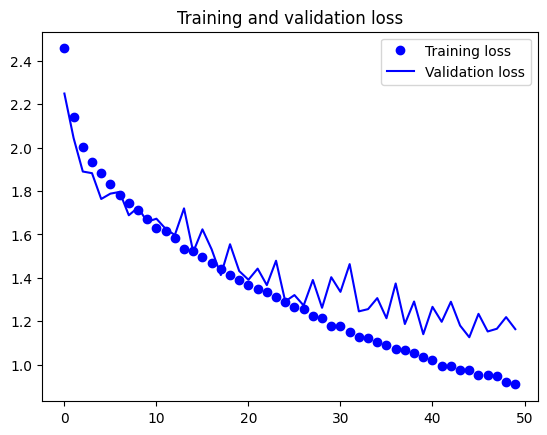

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model4_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model4_l')

plt.show()

In [27]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_4.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6457 - loss: 1.2370
test acc: 0.6639999747276306


In [28]:
model_4.save('models/food_model_4.h5')

### Model #5 (Model 4, momemtum 0.35 | 50 epoch optimal) 0.6259999871253967

After looking at model 4s performance, I wanted to know how the momemtum parameter affects the model, so I decreased it to 0.35.

In [29]:
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Flatten())
model_5.add(layers.Dense(512, activation='relu'))
model_5.add(layers.Dense(10, activation='softmax'))
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,586 (26.00 MB)

 Trainable params: 6,816,586 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-2,momentum=0.35),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_5.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=50, # Tested at 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - acc: 0.1287 - loss: 2.5401 - val_acc: 0.2330 - val_loss: 2.3184
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - acc: 0.2509 - loss: 2.3037 - val_acc: 0.3315 - val_loss: 2.1272
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.3172 - loss: 2.1404 - val_acc: 0.4030 - val_loss: 1.9747
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.3628 - loss: 2.0427 - val_acc: 0.4160 - val_loss: 1.9209
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.3957 - loss: 1.9579 - val_acc: 0.4465 - val_loss: 1.8540
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - acc: 0.4127 - loss: 1.8984 - val_acc: 0.4260 - val_loss: 1.8617
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - acc: 0.4308 - loss: 1.8586 - val_acc: 0.4515 - val_loss: 1.8570
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.4388 

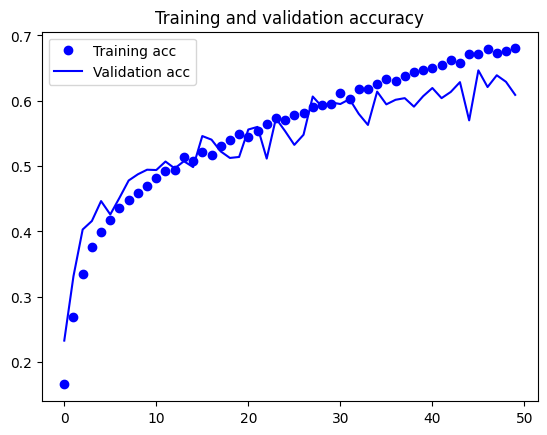

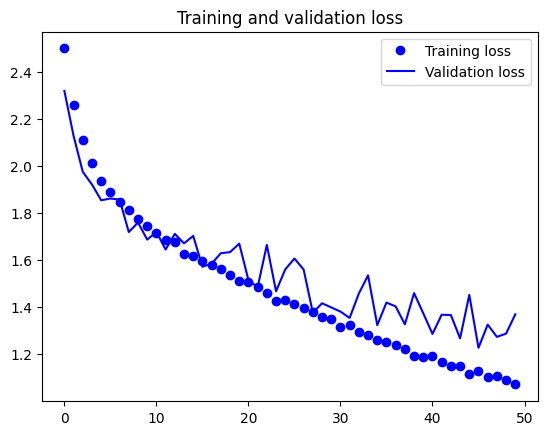

In [31]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model5_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model5_l')

plt.show()

In [32]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_5.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6376 - loss: 1.3710
test acc: 0.6259999871253967


In [33]:
model_5.save('models/food_model_5.h5')

### Model #6 (Dropout layers, 2 regularizer, Adam 5e-4 | 50 epoch optimal) 0.6919999718666077

To try other optimizers other than SGD and RMSProp, I also tried the Adam optmizer, with 2 regularizers. This resulted in almost equal test scores as model 3, suggesstingn that the Adam optmizer is also good for this model and dataset.

In [34]:
# Build the Model 
from tensorflow.keras import layers
from tensorflow.keras import models, regularizers

img_size = 150

model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Flatten())
model_6.add(layers.Dense(512, activation='relu'))
model_6.add(layers.Dense(10, activation='softmax'))
model_6.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,816,586 (26.00 MB)

 Trainable params: 6,816,586 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_6.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_6.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=50, # Tested at 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - acc: 0.2139 - loss: 2.2393 - val_acc: 0.3715 - val_loss: 1.8918
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.3732 - loss: 1.8131 - val_acc: 0.4230 - val_loss: 1.6939
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4234 - loss: 1.6941 - val_acc: 0.3810 - val_loss: 1.8611
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - acc: 0.4449 - loss: 1.6284 - val_acc: 0.4530 - val_loss: 1.6356
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - acc: 0.4819 - loss: 1.5311 - val_acc: 0.4160 - val_loss: 1.8786
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - acc: 0.4725 - loss: 1.5231 - val_acc: 0.4835 - val_loss: 1.5166
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - acc: 0.4870 - loss: 1.4926 - val_acc: 0.5215 - val_loss: 1.4254
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - acc: 0.4992 

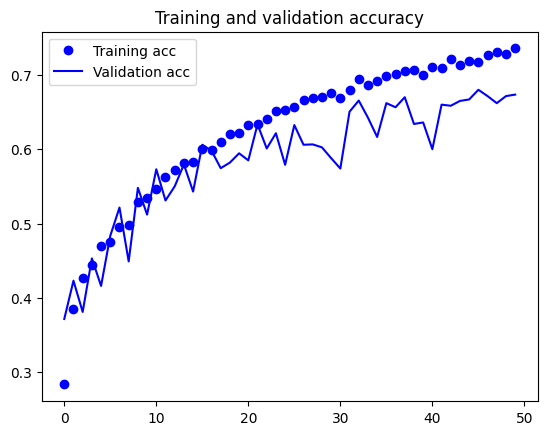

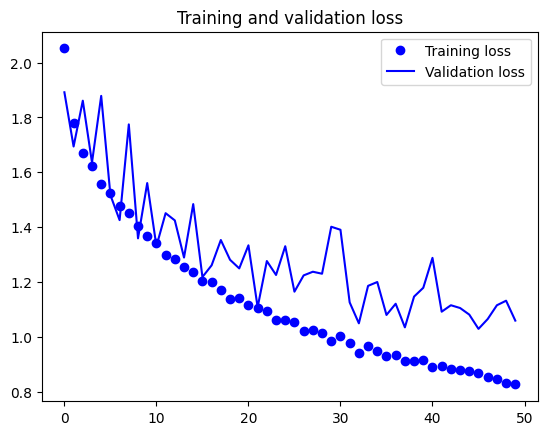

In [36]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model6_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model6_l')

plt.show()

In [37]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_6.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7012 - loss: 1.0498
test acc: 0.6919999718666077


In [38]:
# Save the Model
model_6.save('models/food_model_6.h5')

### Model #7 (VGG 16 Base Model | 30 epochs optimal) 0.6299999952316284

To start exploring the pretrained models, I started off with the vgg16 model, creating a basic model structure to see. The pre trained models naturally performed better than the non pre-trained ones.

In [39]:
# Build the Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
img_size = 150

vgg16_1 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_7 = models.Sequential()
model_7.add(vgg16_1) #VGG16 pretrained
model_7.add(layers.Flatten())
model_7.add(layers.Dense(256, activation='relu'))
model_7.add(layers.Dropout(0.5))
model_7.add(layers.Dense(10, activation='softmax'))
vgg16_1.trainable = False
model_7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,666 (64.14 MB)

 Trainable params: 2,099,978 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [40]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_7.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=30,  # Tested 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 110ms/step - acc: 0.1534 - loss: 2.3965 - val_acc: 0.4320 - val_loss: 1.8545
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.3343 - loss: 1.9274 - val_acc: 0.5065 - val_loss: 1.6036
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.3911 - loss: 1.7631 - val_acc: 0.5290 - val_loss: 1.4725
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.4487 - loss: 1.6241 - val_acc: 0.5475 - val_loss: 1.3744
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - acc: 0.4659 - loss: 1.5530 - val_acc: 0.5735 - val_loss: 1.3100
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.4931 - loss: 1.4989 - val_acc: 0.5920 - val_loss: 1.2643
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - acc: 0.5113 - loss: 1.4509 - val_acc: 0.5910 - val_loss: 1.2228
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - acc: 0.534

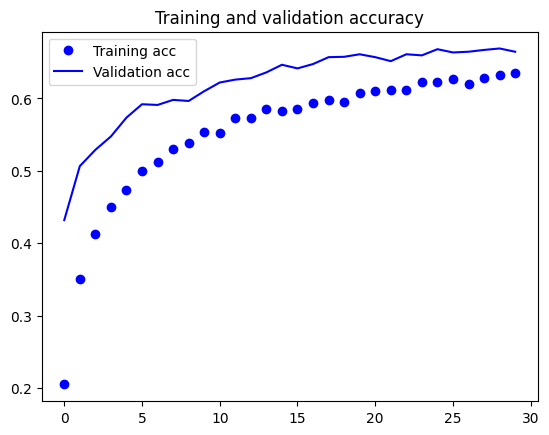

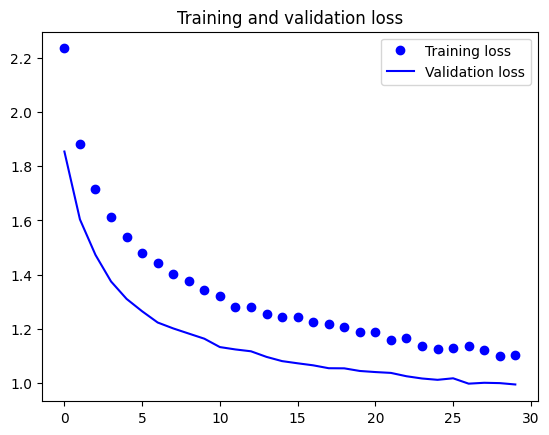

In [41]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model7_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model7_l')

plt.show()

In [42]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_7.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.6210 - loss: 1.0073
test acc: 0.6299999952316284


In [43]:
# Save the Model
model_7.save('models/food_model_7.h5')

### Model #8 (VGG16 Fine tuning | 40 epochs optimal) 0.8019999861717224

To further improve my VGG16 model as I believed it could be better, I added in a stronger regularizer of 0.002, and also unfroze the layers from block5conv1. This was very effective and skyrocketed the accuracy up to 80%

In [44]:
# Build the Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

vgg16_2 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_8 = models.Sequential()
model_8.add(vgg16_2) #VGG16 pretrained
model_8.add(layers.Flatten())
model_8.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model_8.add(layers.Dropout(0.25))
model_8.add(layers.Dense(10, activation='softmax'))
vgg16_2.trainable = True

set_trainable = False
for layer in vgg16_2.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model_8.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,666 (64.14 MB)

 Trainable params: 9,179,402 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [45]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_8.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_8.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=40, # Tested on 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - acc: 0.2781 - loss: 2.9882 - val_acc: 0.6145 - val_loss: 2.0861
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - acc: 0.5736 - loss: 2.1847 - val_acc: 0.6620 - val_loss: 1.9047
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.6456 - loss: 1.9713 - val_acc: 0.7035 - val_loss: 1.7464
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - acc: 0.6943 - loss: 1.7857 - val_acc: 0.7060 - val_loss: 1.7225
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.7244 - loss: 1.6808 - val_acc: 0.7310 - val_loss: 1.6080
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.7366 - loss: 1.5945 - val_acc: 0.7500 - val_loss: 1.5224
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - acc: 0.7585 - loss: 1.5386 - val_acc: 0.7595 - val_loss: 1.4814
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.7765

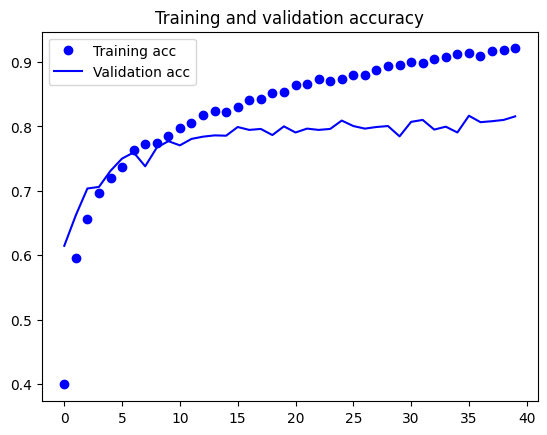

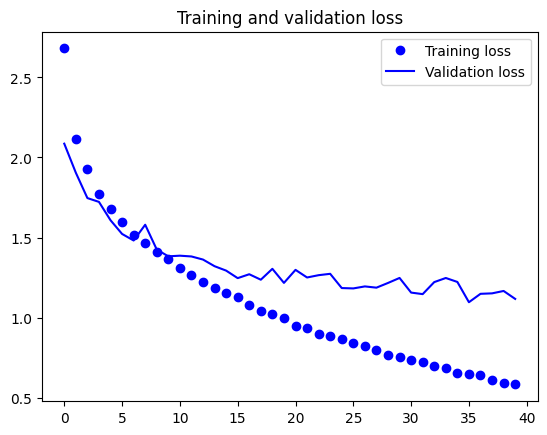

In [46]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model8_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model8_l')

plt.show()

In [47]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_8.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7984 - loss: 1.2603
test acc: 0.8019999861717224


In [48]:
# Save the Model
model_8.save('models/food_model_8.h5')

### Model #9 (ResNet50 Base Model | 40 epochs optimal) 0.24799999594688416

Trying another well known pre trained mdel ResNet. Similarly, built a very basic model to see how it fares against the dataset. It proved better results than the VGG16 in terms of test scores.

In [3]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

resnet50_1 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_9 = models.Sequential()
model_9.add(resnet50_1) 
model_9.add(layers.Flatten())
model_9.add(layers.Dense(256, activation='relu'))
model_9.add(layers.Dropout(0.3))
model_9.add(layers.Dense(10, activation='softmax'))

resnet50_1.trainable = False
model_9.summary()

I0000 00:00:1734357697.691010     915 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,697,738 (139.99 MB)

 Trainable params: 13,110,026 (50.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_9.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-6),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_9.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=40, # Tested at 100 epochs
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


/home/limcz/deeplearning/dl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1734357724.278172    1077 service.cc:148] XLA service 0x7f5be4001c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734357724.279089    1077 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-16 22:02:04.547304: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734357725.695132    1077 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/250 ━━━━━━━━━━━━━━━━━━━━ 53:57 13s/step - acc: 0.1333 - loss: 2.5120

I0000 00:00:1734357731.300609    1077 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - acc: 0.0942 - loss: 2.4876

/home/limcz/deeplearning/dl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 210ms/step - acc: 0.0942 - loss: 2.4874 - val_acc: 0.1515 - val_loss: 2.2803
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - acc: 0.1059 - loss: 2.3553 - val_acc: 0.1550 - val_loss: 2.2685
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - acc: 0.1264 - loss: 2.3082 - val_acc: 0.1645 - val_loss: 2.2558
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - acc: 0.1248 - loss: 2.2838 - val_acc: 0.1795 - val_loss: 2.2452
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - acc: 0.1450 - loss: 2.2716 - val_acc: 0.1830 - val_loss: 2.2352
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - acc: 0.1512 - loss: 2.2600 - val_acc: 0.1780 - val_loss: 2.2320
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - acc: 0.1665 - loss: 2.2526 - val_acc: 0.2040 - val_loss: 2.2208
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - acc: 0.1614 - loss: 2.2509 - val_acc: 0.1935 - val_loss: 2.2225
Epoch 9/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s

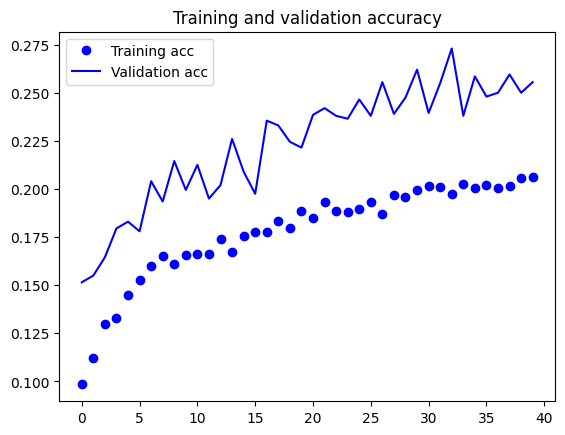

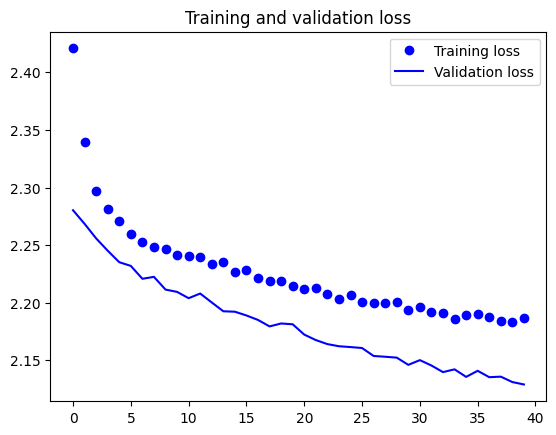

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model9_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model9_l')

plt.show()

In [7]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_9.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - acc: 0.2360 - loss: 2.1183
test acc: 0.24799999594688416


In [8]:
# Save the Model
model_9.save('models/food_model_9.h5')

### Model #10 (ResNet50 Fine Tuning | 40 epochs optimal) 0.7699999809265137

To try and improve the model to better than model 8, I did the same procedure, added a regularizer and unfroze some of its layers. However, this resulted in a decrease in model performance, suggessting that the ResNet models could have understood and learn the dataset in a different way than the other models.

In [9]:
# Build the Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

resnet50_2 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_10 = models.Sequential()
model_10.add(resnet50_2) 
model_10.add(layers.Flatten())
model_10.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model_10.add(layers.Dropout(0.35))
model_10.add(layers.Dense(10, activation='softmax'))
resnet50_2.trainable = True
set_trainable = False
for layer in resnet50_2.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model_10.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,697,738 (139.99 MB)

 Trainable params: 28,086,026 (107.14 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [10]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_10.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.25, 
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_10.fit(
      train_generator,
      steps_per_epoch=250,
      epochs= 40, # Tested on 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 183ms/step - acc: 0.1188 - loss: 3.2650 - val_acc: 0.1180 - val_loss: 2.9209
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - acc: 0.1559 - loss: 2.8623 - val_acc: 0.1830 - val_loss: 2.7331
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - acc: 0.1727 - loss: 2.7812 - val_acc: 0.2035 - val_loss: 2.6917
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - acc: 0.1793 - loss: 2.7450 - val_acc: 0.2200 - val_loss: 2.6670
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - acc: 0.1906 - loss: 2.7312 - val_acc: 0.2270 - val_loss: 2.6438
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - acc: 0.1994 - loss: 2.7131 - val_acc: 0.2280 - val_loss: 2.6282
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 174ms/step - acc: 0.2035 - loss: 2.6800 - val_acc: 0.2475 - val_loss: 2.6055
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - acc: 0.222

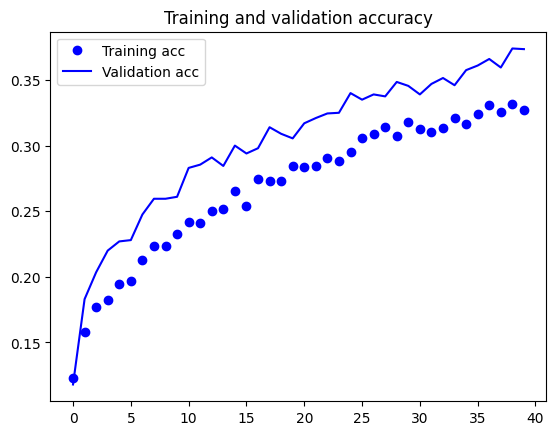

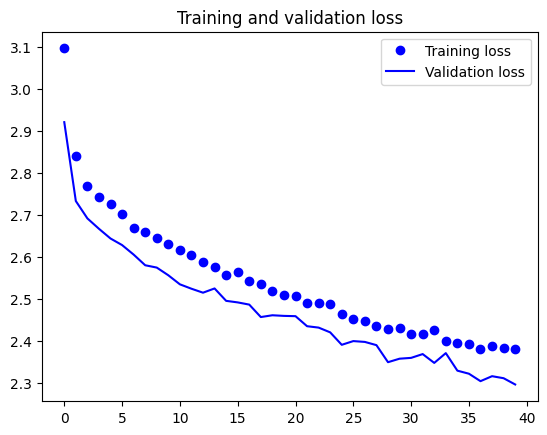

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model10_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model10_l')

plt.show()

In [12]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_10.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.


/home/limcz/deeplearning/dl/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.3518 - loss: 2.2837
test acc: 0.33399999141693115


In [13]:
# Save the Model
model_10.save('models/food_model_10.h5')

### Model #11 (InceptionV3 Base Model | 30 epochs optimal) 0.7179999947547913

Trying another model known for its image classification, I built a basic model and it did better than the base VGG 16.

In [59]:
# Build the Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

inceptionv3_1 = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_11 = models.Sequential()
model_11.add(inceptionv3_1) 
model_11.add(layers.Flatten())
model_11.add(layers.Dense(256, activation='relu'))
model_11.add(layers.Dropout(0.5))
model_11.add(layers.Dense(10, activation='softmax'))
inceptionv3_1.trainable = False
model_11.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,524,202 (101.18 MB)

 Trainable params: 4,721,418 (18.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [60]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_11.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_11.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=30, # Tested at 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - acc: 0.2681 - loss: 2.6458 - val_acc: 0.5765 - val_loss: 1.2823
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.4673 - loss: 1.5769 - val_acc: 0.6240 - val_loss: 1.1050
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.5536 - loss: 1.3523 - val_acc: 0.6500 - val_loss: 1.0314
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.5874 - loss: 1.2610 - val_acc: 0.6685 - val_loss: 0.9780
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - acc: 0.6144 - loss: 1.2197 - val_acc: 0.6805 - val_loss: 0.9365
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - acc: 0.6228 - loss: 1.1678 - val_acc: 0.6885 - val_loss: 0.9565
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.6263 - loss: 1.1384 - val_acc: 0.6870 - val_loss: 0.9608
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - acc: 0.6422

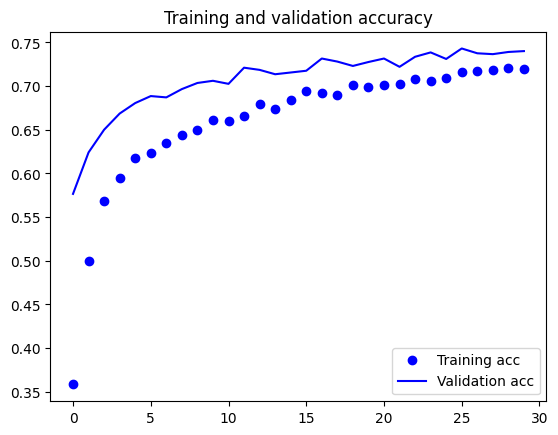

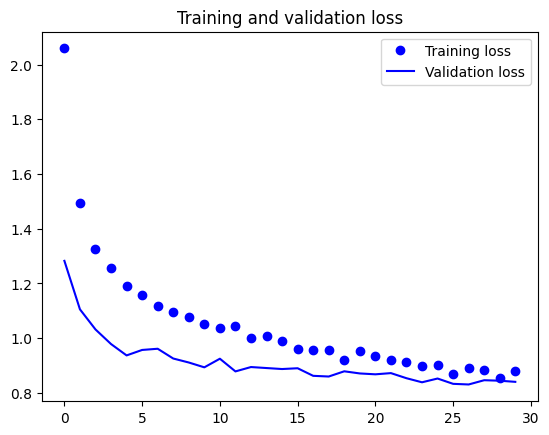

In [61]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model11_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model11_l')

plt.show()

In [62]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_11.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.7359 - loss: 0.8779
test acc: 0.7179999947547913


In [63]:
# Save the Model
model_11.save('models/food_model_11.h5')

### Model #12 (InceptionV3 Fine Tuning | 30 epochs optimal) 0.7839999794960022

Once again applying the same procedure as it proved so effective on VGG16, I added a regularizer and unfroze its layers, and to my surprise it worked well, increasing the performance to 78.4%. This shows that the fine tuning method works, and that the ResNet model is abit harder to deal with. More will be done later on that further proves it.

In [64]:
# Build the Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, regularizers
from tensorflow.keras import layers
img_size = 150

inceptionv3_2 = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
model_12 = models.Sequential()
model_12.add(inceptionv3_2) 
model_12.add(layers.Flatten())
model_12.add(layers.Dense(256, activation='relu'), kernel_regularizer=regularizers.l2(0.001))
model_12.add(layers.Dropout(0.55))
model_12.add(layers.Dense(10, activation='softmax'))
inceptionv3_2.trainable = True

set_trainable = False
for layer in inceptionv3_2.layers:
    if layer.name == 'mixed8':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model_12.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,524,202 (101.18 MB)

 Trainable params: 15,836,298 (60.41 MB)

 Non-trainable params: 10,687,904 (40.77 MB)

In [65]:
# Train the Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_12.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(img_size, img_size),
        batch_size=30, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=8,
        class_mode='categorical')

history = model_12.fit(
      train_generator,
      steps_per_epoch=250,
      epochs=30, # Tested on 100 epochs previously
      validation_data=validation_generator,
      validation_steps=250) 

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - acc: 0.1760 - loss: 2.4684 - val_acc: 0.4845 - val_loss: 1.5966
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - acc: 0.3860 - loss: 1.7879 - val_acc: 0.6055 - val_loss: 1.2443
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.4852 - loss: 1.4932 - val_acc: 0.6530 - val_loss: 1.0581
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - acc: 0.5653 - loss: 1.2956 - val_acc: 0.6785 - val_loss: 0.9659
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.5963 - loss: 1.1925 - val_acc: 0.6990 - val_loss: 0.9083
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - acc: 0.6363 - loss: 1.1039 - val_acc: 0.7180 - val_loss: 0.8573
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - acc: 0.6646 - loss: 1.0452 - val_acc: 0.7230 - val_loss: 0.8316
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - acc: 0.6739 

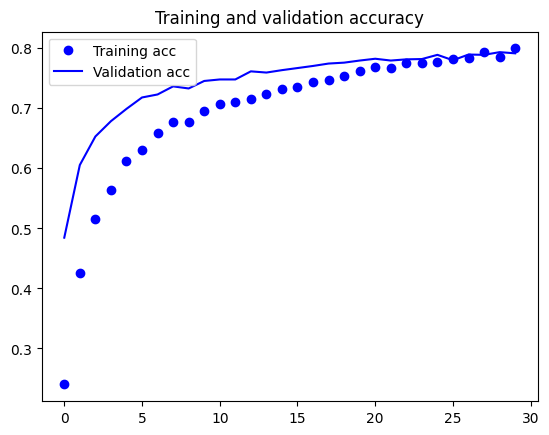

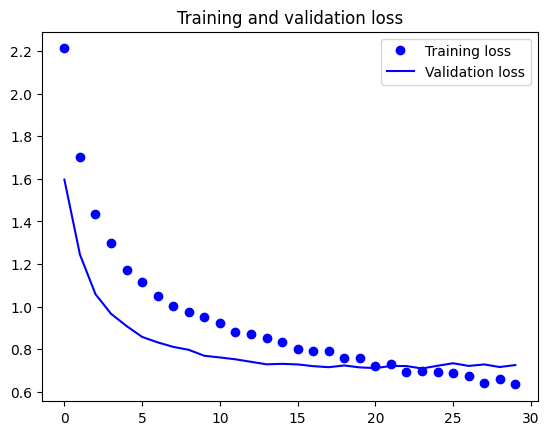

In [66]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('graphs/model12_a')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('graphs/model12_l')

plt.show()

In [67]:
#evaluate
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')

test_loss, test_acc = model_12.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - acc: 0.7846 - loss: 0.7750
test acc: 0.7839999794960022


In [68]:
# Save the Model
model_12.save('models/food_model_12.h5')

## Step 4  – Use the best model to make prediction

After all the model building and testing, the top 3 models are Model #8, Model #9, and Model #12. To get more accurate test results, I sourced 2 images per food item, a total of 20 iamges. I made sure that the 2 images for each food item are different in terms of angle, colour, and shading. This way, it can simulate a dataset where images can be of different variations. These are the results:

- Model #8 VGG 16 Finetuned: This model got 18/20 correct. This proves that the model has learnt well from the training process and is able to more or less classify the items correctly with at least 75% accuracy, which I am sure could be further increased with more training.
- Model #9 ResNet Base Model: This model got 2/20 correct. This was the result that surprised me the most. Even though it achieve a high test accuracy of 77%, it performed extremely bad on these images, which tells me that something went wrong during its training process and it got overfitted on a particular food item or a wrong way of extracting features. I also tested it on Model #10 which is the Finetuned ResNet but similar results appeared with a different food item. Therefore, ResNet is not suitable for this use case.
- Model #12 IncepetionV3 Finetuned: This model got 19/20 correct. This is the model that achieve the highest among all 3 models, and did not fall too behind with a 78% for its test accuracy scores. Since I chose the images to make sure they are of different angles, colours, and lighting, it was still able to get 19/20 correct, displaing its ability to extract and focus on the right features of the image.

In the end, I chose Model #9, the Finetuned InceptionV3 model as my final model, as I believe it is the most flexible model out of all the models.

In [6]:
# Load the model 
from tensorflow.keras import models
model = models.load_model('models/food_model_9.h5')

In [7]:
# Load the food list (in alphabetical order)
with open('39.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['baby_back_ribs', 'baklava', 'beef_carpaccio', 'cheese_plate', 'dumplings', 'huevos_rancheros', 'lasagna', 'macaroni_and_cheese', 'seaweed_salad', 'spring_rolls']


In [8]:
# Define functions for image processing and model prediction
from keras.preprocessing.image import load_img, img_to_array
img_size = 150
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

--------------------------------------------------------------------------------------------------------------------------------------------


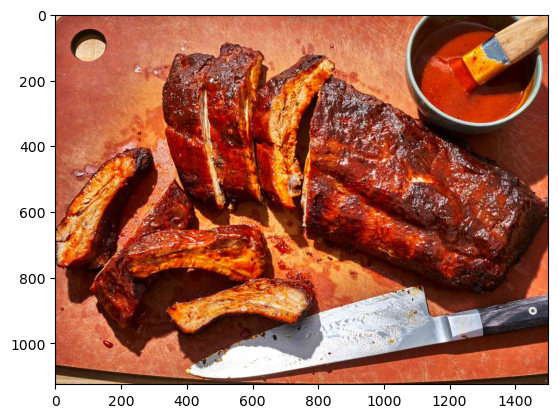

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The prediction is: lasagna This is baby_back_ribs. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.038872  0.176333        0.150569      0.060888   0.085288   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.007354  0.403515             0.034449       0.038284   

   spring_rolls  
0      0.004449  
--------------------------------------------------------------------------------------------------------------------------------------------


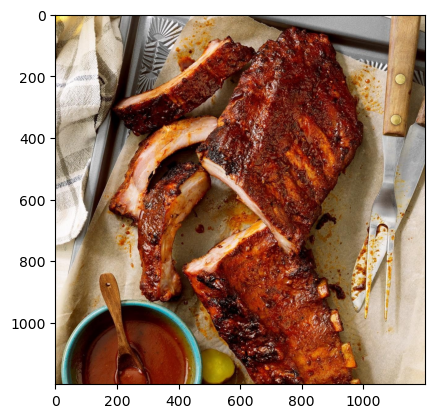

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The prediction is: lasagna This is baby_back_ribs. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.044556  0.185491        0.143356      0.065381   0.117726   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.013613  0.342376             0.030963       0.050465   

   spring_rolls  
0      0.006073  
--------------------------------------------------------------------------------------------------------------------------------------------


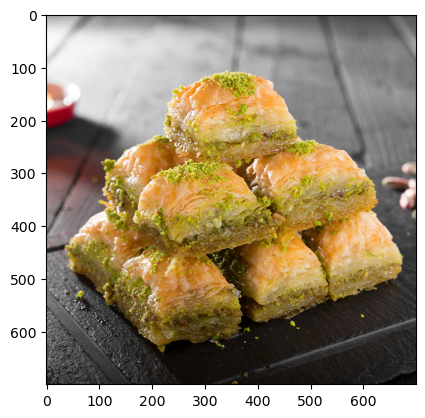

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The prediction is: lasagna This is baklava. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.047781  0.179795        0.110361      0.058117   0.108295   

   huevos_rancheros  lasagna  macaroni_and_cheese  seaweed_salad  spring_rolls  
0          0.009906  0.40929             0.034721       0.036269      0.005465  
--------------------------------------------------------------------------------------------------------------------------------------------


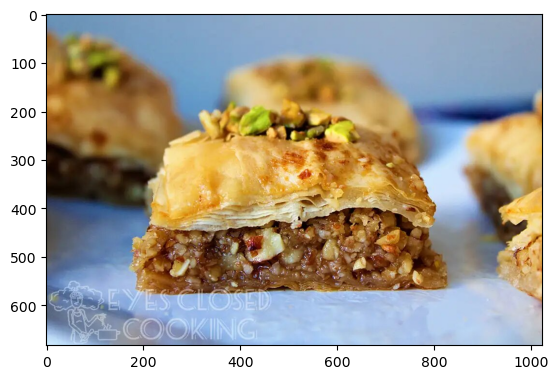

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The prediction is: lasagna This is baklava. 

    baby_back_ribs  baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.042941  0.15783        0.112319      0.053211   0.102641   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.008907  0.456686             0.030098       0.029996   

   spring_rolls  
0      0.005372  
--------------------------------------------------------------------------------------------------------------------------------------------


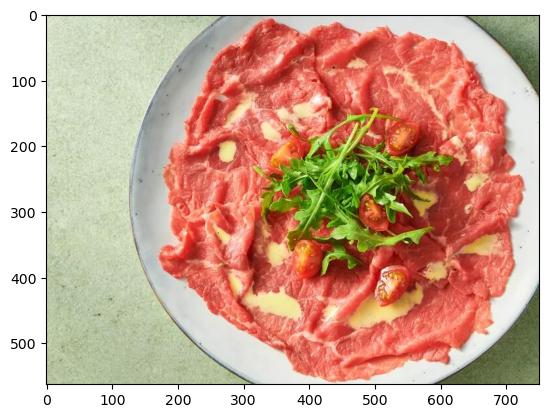

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The prediction is: lasagna This is beef_carpaccio. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.048652  0.157295           0.153      0.059983    0.09928   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.013447  0.399029             0.031063       0.032952   

   spring_rolls  
0      0.005299  
--------------------------------------------------------------------------------------------------------------------------------------------


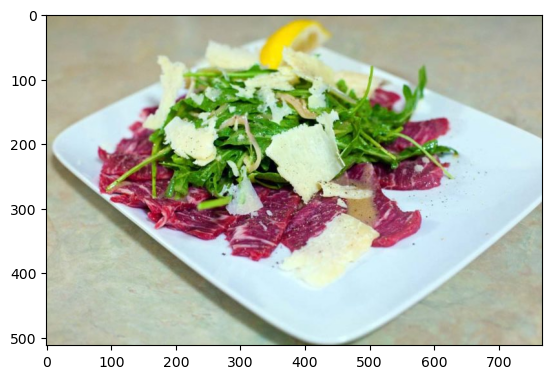

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The prediction is: lasagna This is beef_carpaccio. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.031164  0.181755         0.11865      0.070257   0.098382   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.008084  0.421226             0.029086       0.035351   

   spring_rolls  
0      0.006044  
--------------------------------------------------------------------------------------------------------------------------------------------


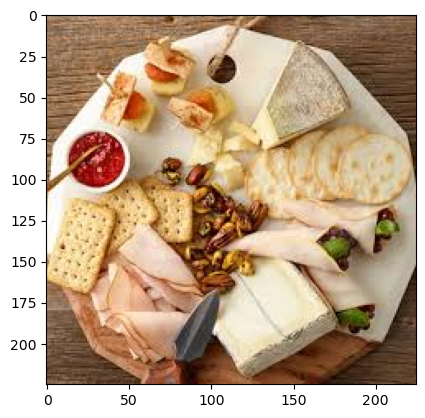

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
The prediction is: lasagna This is cheese_plate. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.041147  0.204468        0.144389      0.068912    0.11541   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009096  0.345225             0.030676       0.035261   

   spring_rolls  
0      0.005416  
--------------------------------------------------------------------------------------------------------------------------------------------


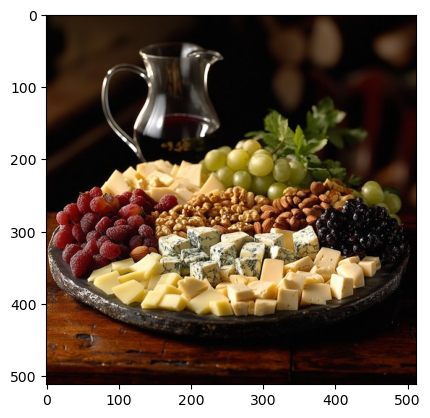

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The prediction is: lasagna This is cheese_plate. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.033776  0.200534        0.117366      0.067332   0.093249   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.008859  0.406522             0.029716       0.036128   

   spring_rolls  
0      0.006517  
--------------------------------------------------------------------------------------------------------------------------------------------


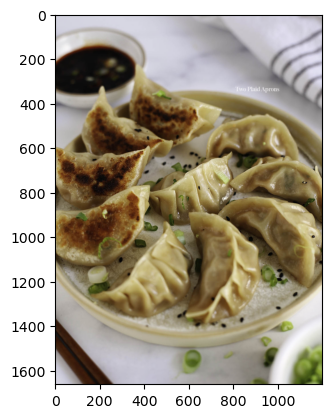

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The prediction is: lasagna This is dumplings. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.050169  0.154459        0.167582      0.048189   0.085544   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009847  0.415181             0.029797        0.03505   

   spring_rolls  
0      0.004183  
--------------------------------------------------------------------------------------------------------------------------------------------


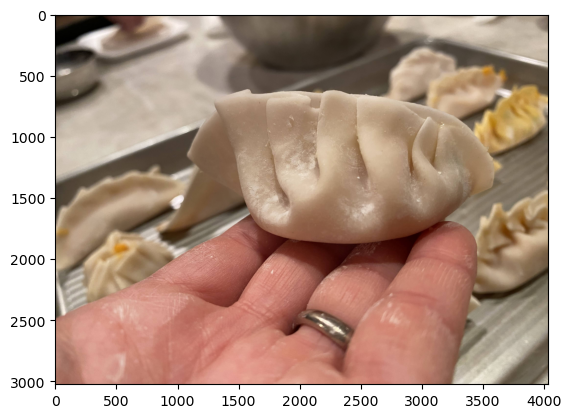

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The prediction is: lasagna This is dumplings. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.046988  0.180332        0.130184      0.065011   0.096227   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.011433  0.389156             0.036249        0.03849   

   spring_rolls  
0       0.00593  
--------------------------------------------------------------------------------------------------------------------------------------------


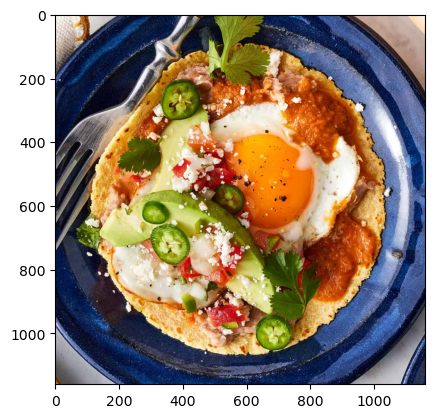

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The prediction is: lasagna This is huevos_rancheros. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.037296  0.154979        0.185905      0.071988   0.116792   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009215  0.345461             0.033198       0.040529   

   spring_rolls  
0      0.004638  
--------------------------------------------------------------------------------------------------------------------------------------------


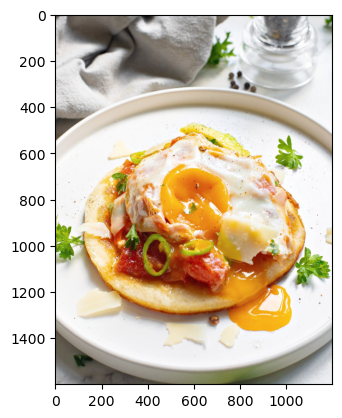

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The prediction is: lasagna This is huevos_rancheros. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.048615  0.163752        0.140305      0.053131   0.091244   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009668  0.419688             0.032977       0.035614   

   spring_rolls  
0      0.005005  
--------------------------------------------------------------------------------------------------------------------------------------------


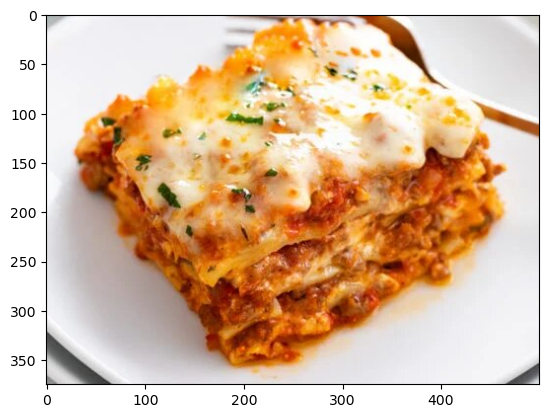

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The prediction is: lasagna This is lasagna. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.042436  0.164159        0.129535      0.070935   0.120465   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.010619  0.385565             0.029025       0.040786   

   spring_rolls  
0      0.006474  
--------------------------------------------------------------------------------------------------------------------------------------------


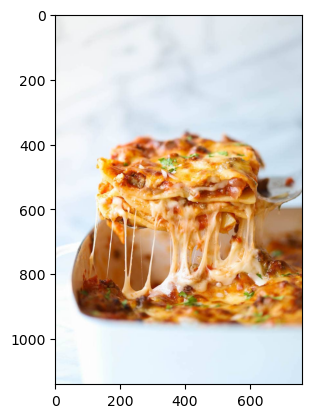

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The prediction is: lasagna This is lasagna. 

    baby_back_ribs  baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.046735  0.15905        0.123107      0.050437    0.09334   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.010472  0.439975             0.034221        0.03735   

   spring_rolls  
0      0.005313  
--------------------------------------------------------------------------------------------------------------------------------------------


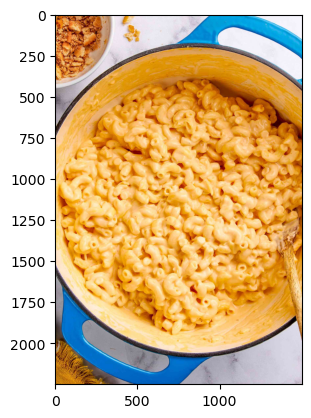

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The prediction is: lasagna This is macaroni_and_cheese. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.057685  0.168087        0.149805      0.057941   0.121237   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.013193  0.354345             0.028639       0.043509   

   spring_rolls  
0       0.00556  
--------------------------------------------------------------------------------------------------------------------------------------------


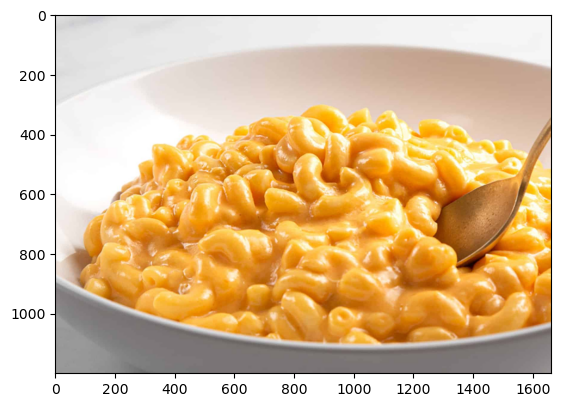

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The prediction is: lasagna This is macaroni_and_cheese. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.047288  0.170607        0.139521      0.053977   0.108687   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.010698  0.397662             0.034022       0.032709   

   spring_rolls  
0      0.004831  
--------------------------------------------------------------------------------------------------------------------------------------------


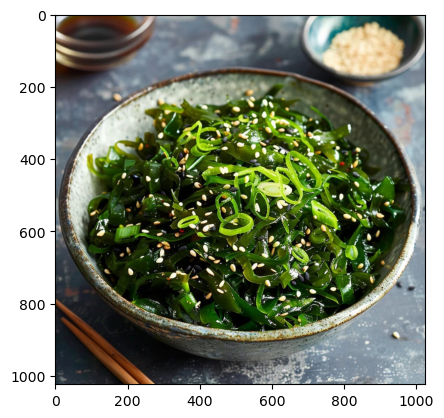

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The prediction is: lasagna This is seaweed_salad. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0          0.0462  0.160584        0.171809      0.060668   0.088768   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009482  0.394954             0.027176       0.036832   

   spring_rolls  
0      0.003527  
--------------------------------------------------------------------------------------------------------------------------------------------


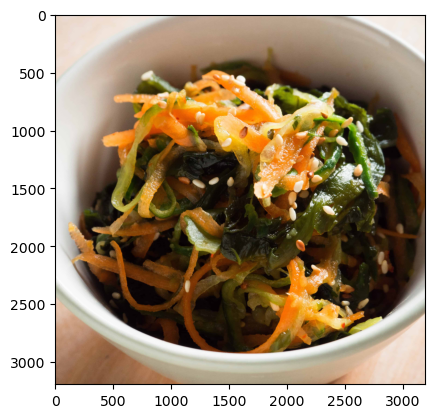

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The prediction is: lasagna This is seaweed_salad. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.035165  0.187351        0.191927      0.057456   0.087924   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.009322  0.343991              0.02998       0.050397   

   spring_rolls  
0      0.006487  
--------------------------------------------------------------------------------------------------------------------------------------------


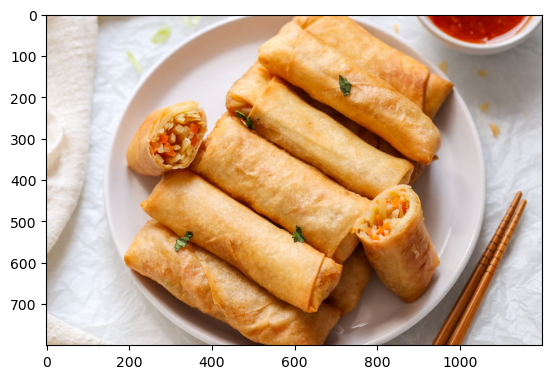

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The prediction is: lasagna This is spring_rolls. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.033239  0.139583        0.142561      0.077581   0.105862   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0          0.006129  0.437114             0.025883       0.026891   

   spring_rolls  
0      0.005156  
--------------------------------------------------------------------------------------------------------------------------------------------


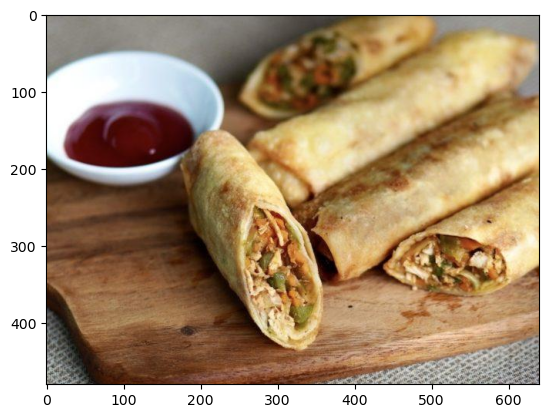

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The prediction is: lasagna This is spring_rolls. 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.033913  0.162371        0.134045      0.075799   0.125975   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0           0.00907  0.394848             0.029953        0.02902   

   spring_rolls  
0      0.005006  
This model got 2/20 correct


In [9]:
import matplotlib.pyplot as plt
import numpy as np

correct = 0
for food in food_list:
    # Make prediction for image downloaded from internet
    img = f'online_images/{food}.jpg'
    print('--------------------------------------------------------------------------------------------------------------------------------------------')
    plt.imshow(plt.imread(img))
    plt.show()

    img_array = image_process(img)
    prob_df, result = prediction(model, img_array, food_list)
    print('The prediction is:', result, f'This is {food}.', '\n\n', prob_df)

    img2 = f'online_images/{food}2.jpg'
    print('--------------------------------------------------------------------------------------------------------------------------------------------')
    plt.imshow(plt.imread(img2))
    plt.show()

    img_array2 = image_process(img2)
    prob_df, result2 = prediction(model, img_array2, food_list)
    print('The prediction is:', result2, f'This is {food}.', '\n\n', prob_df)

    if food == result:
        correct += 1
    if food == result2:
        correct += 1
print(f'This model got {correct}/20 correct')

#### Just to test on unexpected images

--------------------------------------------------------------------------------------------------------------------------------------------


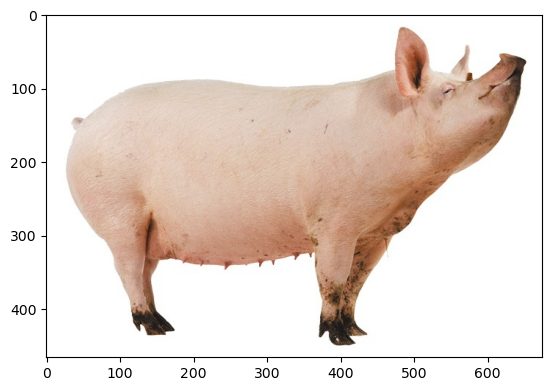

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The prediction is: lasagna 

    baby_back_ribs   baklava  beef_carpaccio  cheese_plate  dumplings  \
0        0.039471  0.165854        0.132082      0.052932   0.086007   

   huevos_rancheros   lasagna  macaroni_and_cheese  seaweed_salad  \
0           0.00877  0.460778             0.026223       0.024583   

   spring_rolls  
0      0.003299  


In [10]:
img2 = f'online_images/pig.jpg'
print('--------------------------------------------------------------------------------------------------------------------------------------------')
plt.imshow(plt.imread(img2))
plt.show()

img_array2 = image_process(img2)
prob_df, result = prediction(model, img_array2, food_list)
print('The prediction is:', result, '\n\n', prob_df)